# Linear Regression from Scratch

## Error Computation

In [69]:
import numpy as np
def error(b, m, points):
    total_error = 0                               #initial error
    for i in range(1, len(points)):
        x = points[i, 0]                          #the first column is selected{0}
        y = points[i, 1]                          #the second column is selected{1}
        total_error += pow((y - (m * x + b)),2)   #square the error to make it positive
    return total_error/float(len(points))         #return average error

## Gradient Descent

In [70]:
def step_gradient(initial_b, initial_m,learning_rate,points):
    gradient_b = 0
    gradient_m = 0
    for i in range(1, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        N = float(len(points))
        gradient_b += -(2/N) * (y-((initial_m * x) + initial_b))     #partial differentiation of the error with respect to b 
        gradient_m += -(2/N) * x * (y-((initial_m * x) + initial_b)) #partial differentiation of the error with respect to m
    new_b = initial_b - (learning_rate * gradient_b)                 #learning rate decides the step distance it should take
    new_m = initial_m - (learning_rate * gradient_m)
    return[new_b, new_m]


## Iterations

In [71]:
def gradient_runner(initial_b, initial_m, learning_rate, number_of_iterations,points):
    b=initial_b
    m=initial_m
    for i in range(number_of_iterations):                           #no:of:times the step_gradient should run
        b, m = step_gradient(b,m,learning_rate,points)
    return[b,m]

## Combining the functions

In [72]:
def run():
    points = np.genfromtxt("data.csv", delimiter=',')
    learning_rate = 0.0001
    initial_b = 0
    initial_m = 0
    number_of_iterations = 10
    print(
        f"Starting Gradient Descent for the values b={initial_b},m={initial_m},Error={error(initial_b,initial_m,points)},iterations=0")
    print ("Running...")
    [b, m] = gradient_runner(initial_b, initial_m, learning_rate, number_of_iterations,points)
    print (f"After {number_of_iterations} iterations b = {b}, m = {m}, error = {error(b, m, points)}")
    return[b,m]

## Data Visualization

Starting Gradient Descent for the values b=0,m=0,Error=5510.007756921338,iterations=0
Running...
After 10 iterations b = 0.029630383249627218, m = 1.4772640915080535, error = 111.54163846419536
50 73.8928349586523


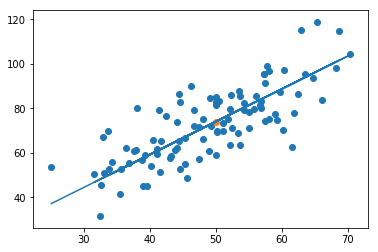

In [73]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('data.csv')
b,m= run()
v=((m*df.x)+b)
plt.plot(df.x,v)
plt.scatter(df.x,df.y)
#Enter a value for x and the predicted output is obtained
input_x=50
output_y=(m*input_x)+b
print(input_x,output_y)
plt.scatter(input_x,output_y)